In [ ]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('/home/jorge/thesis')

from matplotlib import pyplot as plt
from torchvision.io import read_image
import torchvision.transforms.functional as TF
import torch

device = 'cuda'
res = 512

image = read_image("data/images/airplane.png") / 255
image = TF.resize(image, (res, res))
image = image.permute(1, 2, 0).to(device)

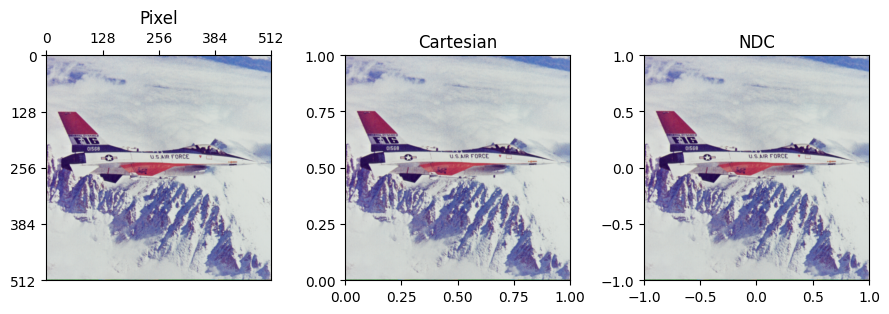

In [2]:
scale = 3
fig, axs = plt.subplots(1, 3, figsize=(scale * 3, scale))

ax_pixel = axs[0]
ax_cartesian = axs[1]
ax_ndc = axs[2]

pixel_ticks = torch.linspace(0, res, 5).int()
ax_pixel.set_title("Pixel")
ax_pixel.imshow(image.cpu())
ax_pixel.xaxis.set_ticks_position("top")
ax_pixel.set_xticks(pixel_ticks)
ax_pixel.set_yticks(pixel_ticks)

cartesian_ticks = [0, 0.25, 0.5, 0.75, 1]
ax_cartesian.set_title("Cartesian")
ax_cartesian.imshow(image.cpu(), extent=[0, 1, 0, 1])
ax_cartesian.set_xticks(cartesian_ticks)
ax_cartesian.set_yticks(cartesian_ticks)

ndc_ticks = [-1, -0.5, 0, 0.5, 1]
ax_ndc.set_title("NDC")
ax_ndc.imshow(image.cpu(), extent=(-1, 1, -1, 1))
ax_ndc.set_xticks(ndc_ticks)
ax_ndc.set_yticks(ndc_ticks)

plt.tight_layout()